In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("base_cleaned_data.csv")

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_num = df[num_cols].copy()

c:\Users\nnn60\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nnn60\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\nnn60\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nnn60\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


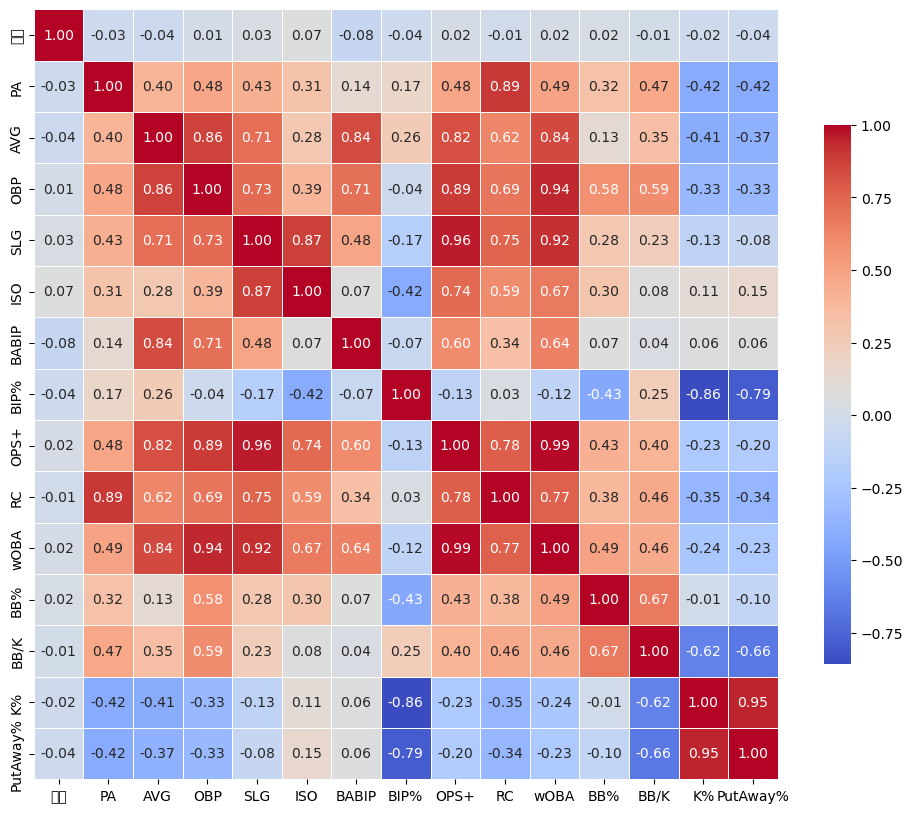

In [8]:
corr = df_num[num_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    ax=ax
)
plt.show()

In [9]:
df_model = df_num.drop(columns=['背號', 'BIP%'])

In [11]:
X = df_model.drop(columns=['OPS+'])
y = df_model['OPS+']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=99
)

In [17]:
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\nnn60\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2)*(n-1)/(n-k-1)
resid = y_test - y_pred
rss = np.sum(resid**2)
aic = n * np.log(rss/n) + 2*k
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 2.2069
R^2: 0.9931
Adjusted R^2: 0.9908
AIC: 99.9947


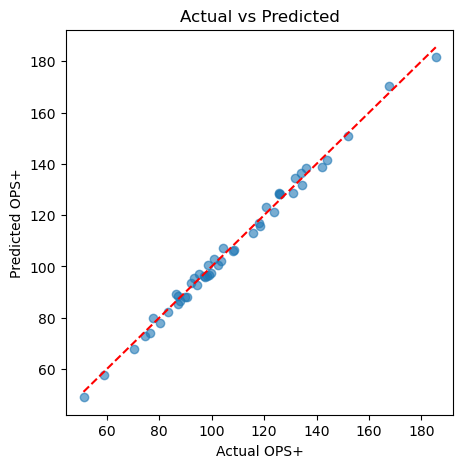

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

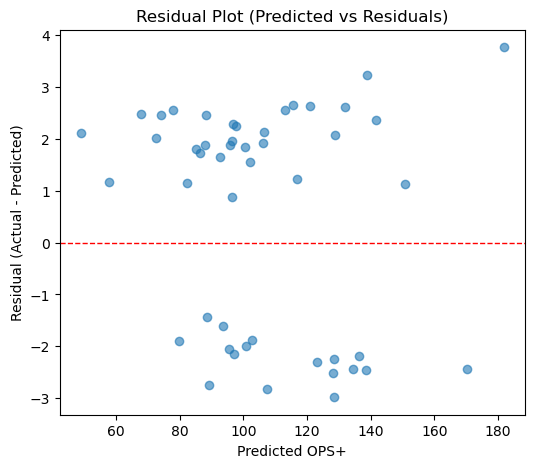

In [23]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

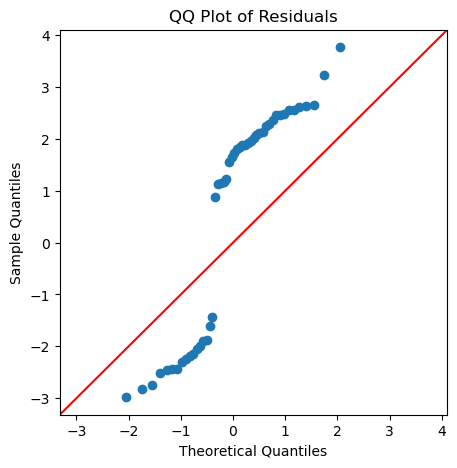

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

In [71]:
pca = PCA(n_components=0.95)  # 保留 95% 變異量
X_pca = pca.fit_transform(X_scaled)
print(f"原始維度: {X_scaled.shape[1]}, PCA後維度: {X_pca.shape[1]}")

原始維度: 12, PCA後維度: 5


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=99
)

In [73]:
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
resid = y_test - y_pred
rss = np.sum(resid**2)
aic = n * np.log(rss / n) + 2 * k
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 2.3667
R^2: 0.9921
Adjusted R^2: 0.9912
AIC: 92.7028


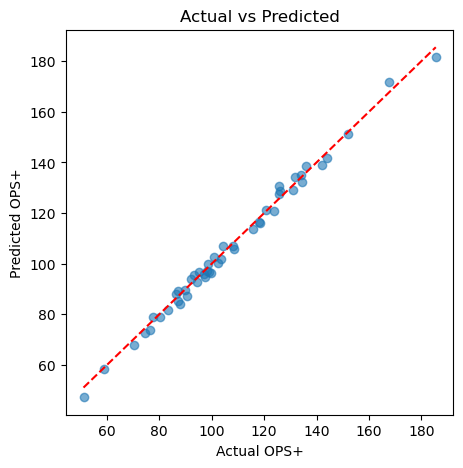

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

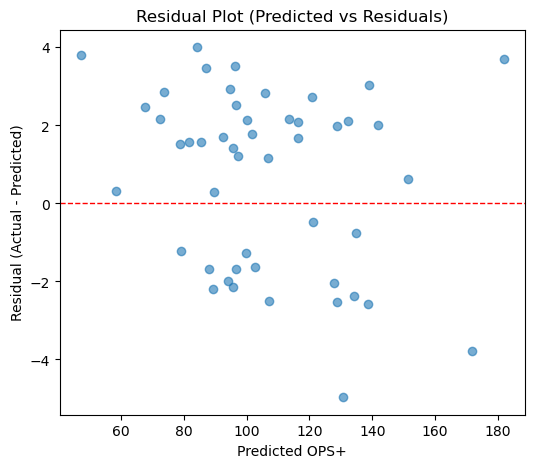

In [80]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

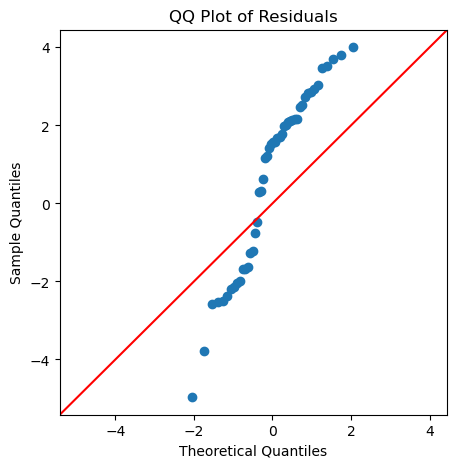

In [81]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

In [ ]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.3, random_state=99
)
model = HuberRegressor()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

resid_log = y_test - y_pred_log
sigma2 = np.var(resid_log, ddof=1)

y_pred = np.expm1(y_pred_log + 0.5*sigma2)
y_test_orig = np.expm1(y_test)

c:\Users\nnn60\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [104]:
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
r2 = r2_score(y_test_orig, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

resid = y_test_orig - y_pred
rss = np.sum(resid**2)
aic = n * np.log(rss / n) + 2 * k

print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 5.8556
R^2: 0.9517
Adjusted R^2: 0.9352
AIC: 193.6706


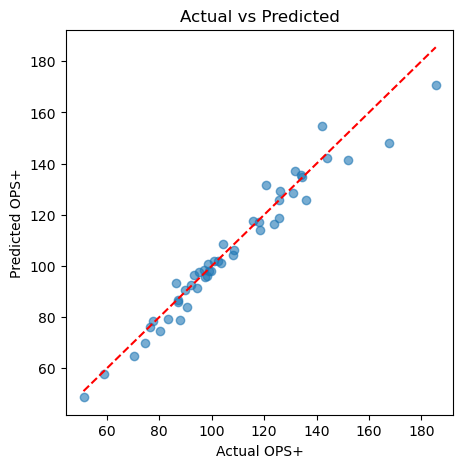

In [105]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test_orig, y_pred, alpha=0.6)
ax.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

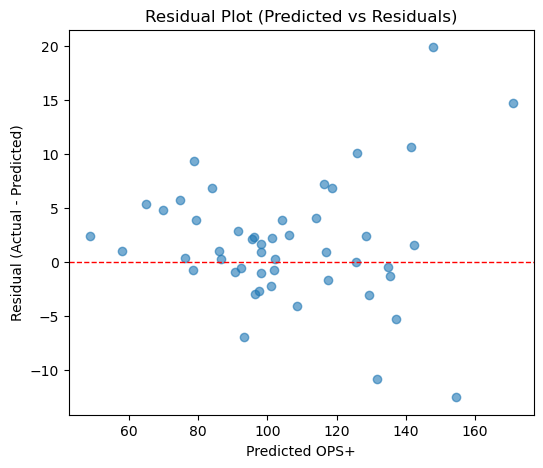

In [106]:
residuals = y_test_orig - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

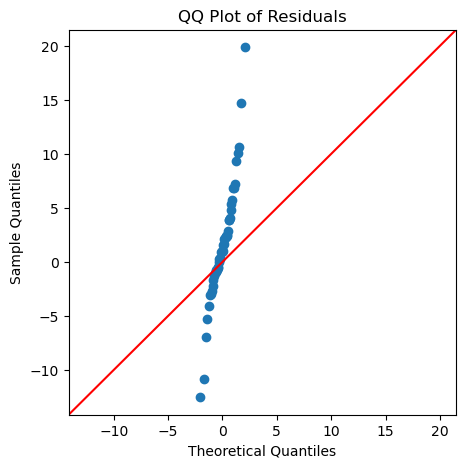

In [107]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()